In [1]:
import pandas as  pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv(r'/content/drive/MyDrive/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513 (2).csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.head()

,Date,MyWay,Paper Ticket
0,2019-07-01,66215,4325
1,2023-09-15,63800,7349
2,2021-12-28,9994,1882
3,2023-01-11,43769,3991
4,2021-09-11,3810,685


In [5]:
data.set_index('Date',inplace=True)
data.head()

,MyWay,Paper Ticket
Date,,
2019-07-01,66215,4325
2023-09-15,63800,7349
2021-12-28,9994,1882
2023-01-11,43769,3991
2021-09-11,3810,685


In [6]:
sd='2023-04-01'
ed='2024-04-30'
data=data[data.index>=sd]

In [7]:
data=data[data.index<=ed]

In [8]:
data=data['MyWay']

In [9]:
rollmean=data.rolling(window=15).mean()
rollmean.head(17)

Date
2023-09-15             NaN
2023-08-29             NaN
2023-04-11             NaN
2023-09-17             NaN
2023-10-07             NaN
2024-03-07             NaN
2024-01-13             NaN
2023-06-16             NaN
2023-08-07             NaN
2024-03-27             NaN
2024-04-15             NaN
2023-08-30             NaN
2023-05-13             NaN
2023-07-12             NaN
2024-04-03    52746.800000
2023-07-19    52873.133333
2024-04-06    49605.466667
Name: MyWay, dtype: float64

In [10]:
rollstd=data.rolling(window=15).std()
rollstd.head(17)

Date
2023-09-15             NaN
2023-08-29             NaN
2023-04-11             NaN
2023-09-17             NaN
2023-10-07             NaN
2024-03-07             NaN
2024-01-13             NaN
2023-06-16             NaN
2023-08-07             NaN
2024-03-27             NaN
2024-04-15             NaN
2023-08-30             NaN
2023-05-13             NaN
2023-07-12             NaN
2024-04-03    21255.845859
2023-07-19    21331.728575
2024-04-06    22387.482424
Name: MyWay, dtype: float64

Text(0.5, 1.0, 'Test For Stationarity - Rolling Statistics')

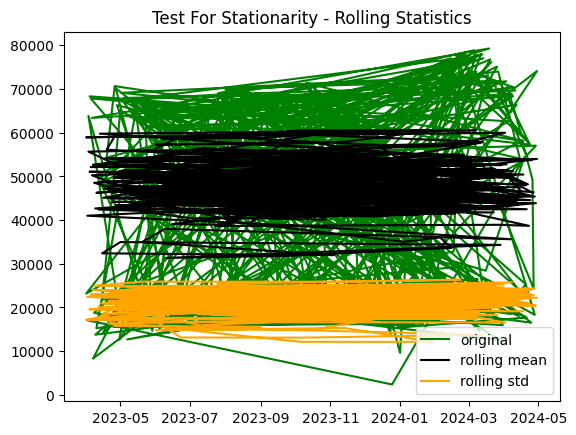

In [11]:
# plot rolling statistics
import matplotlib.pyplot as plt
orig=plt.plot(data,color='green',label='original') # if not write this plt.legend() label will be not shown
mean=plt.plot(rollmean,color='black',label='rolling mean')
std=plt.plot(rollstd,color='orange',label='rolling std')
plt.legend()
plt.title('Test For Stationarity - Rolling Statistics')

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
dtest= adfuller(data)
dtest

(-19.573722804704957,
 0.0,
 0,
 395,
 {'1%': -3.447014064067954,
  '5%': -2.8688850015516016,
  '10%': -2.5706826870693797},
 8627.577588007394)

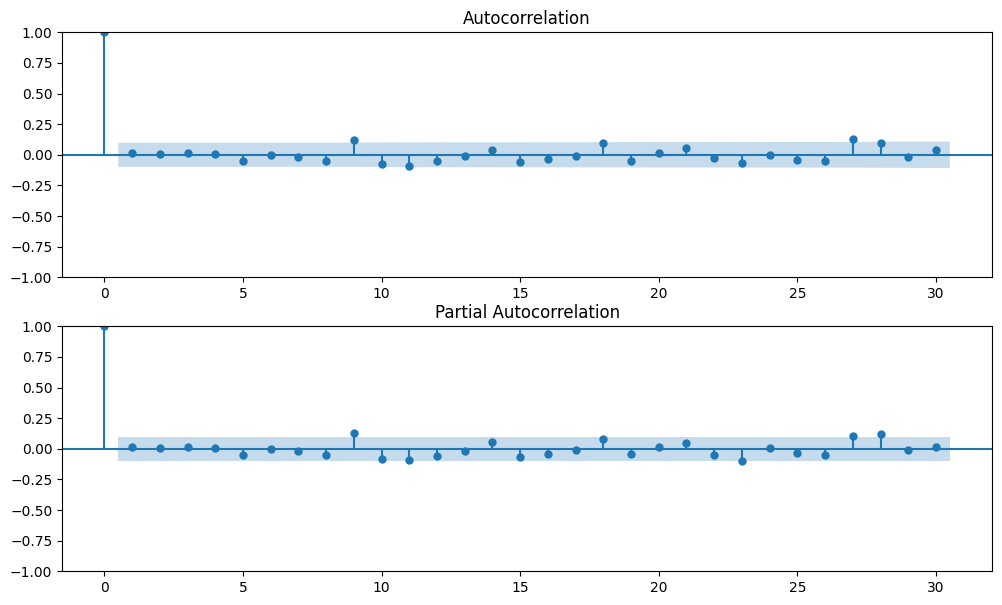

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize=(12,7))
plt.subplot(211)
plot_acf(data,ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(data, ax=plt.gca(), lags=30, method='yw')


plt.show()


In [21]:
forecast_window_size = 7
forecast_moving_avg = data.rolling(window=forecast_window_size).mean()

In [22]:
latest_date = data.index.max()
next_7_days = pd.date_range(start=latest_date + pd.Timedelta(days=1), periods=7)
forecast_values = forecast_moving_avg[-forecast_window_size:]

In [23]:
forecast_df = pd.DataFrame({'Date': next_7_days, 'MyWay Forecast': forecast_values})
Result=forecast_df.set_index('Date')

print("Forecasted values for the next 7 days:")
print(Result)

Forecasted values for the next 7 days:
            MyWay Forecast
Date                      
2024-05-01    49142.857143
2024-05-02    45160.285714
2024-05-03    53407.714286
2024-05-04    52759.571429
2024-05-05    52926.428571
2024-05-06    52583.000000
2024-05-07    53917.571429
